In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pylab import rcParams
rcParams['font.family'] = 'Malgun Gothic'

In [3]:
titanic = pd.read_csv("titanic_train.csv", index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<Axes: xlabel='Pclass', ylabel='count'>

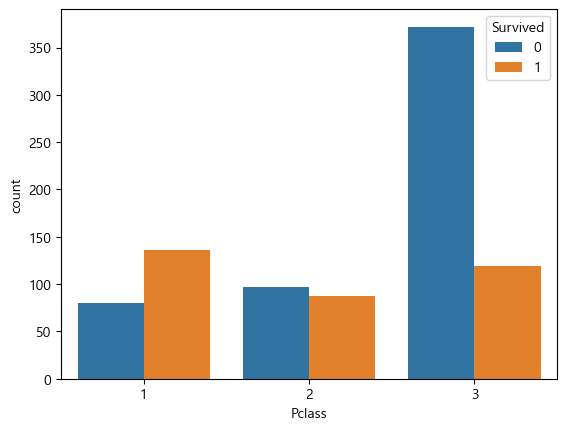

In [5]:
# EDA

sns.countplot(data = titanic, x='Pclass', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

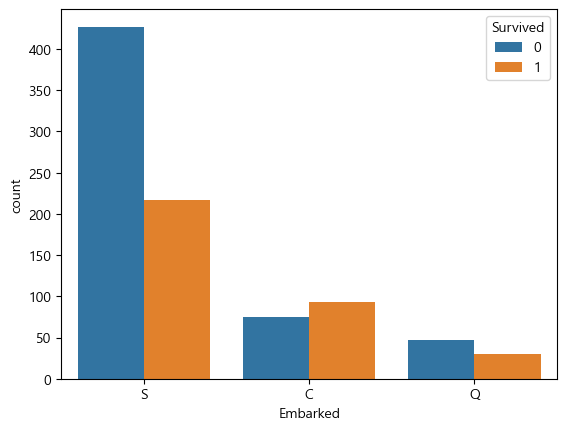

In [6]:
# Embarked에 따라 생존자,사망자가 얼마나 존재하는지 countplot으로 그려보세요.

sns.countplot(data=titanic, x='Embarked', hue='Survived')

In [7]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [9]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [10]:
# 한 칼럼 내 존재하는 값들의 샘플 비중 확인하기

titanic['Embarked'].value_counts()/len(titanic) * 100

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64

In [11]:
titanic.shape[0]

891

In [12]:
len(titanic)

891

<Axes: xlabel='Sex', ylabel='count'>

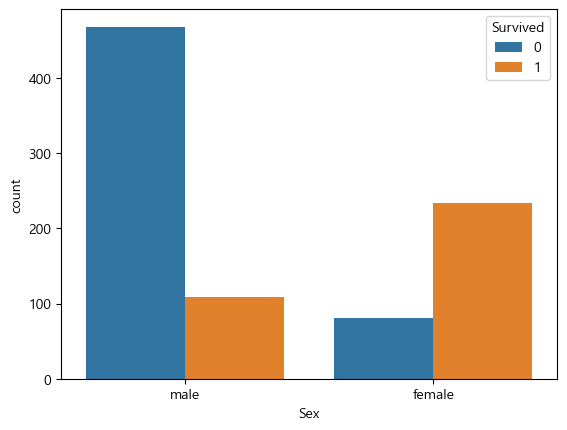

In [13]:
# 성별 칼럼을 생존자여부에 따른 샘플 수를 시각화해보세요.
sns.countplot(data=titanic, x='Sex', hue='Survived')



In [14]:
# 성별마다 카운트 값을 구해보세요.
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Fare'>

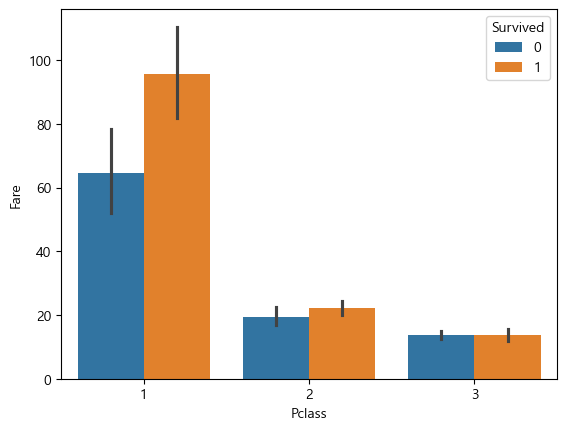

In [15]:
# 2개의 변수 간의 조합으로 사망자, 생존자 수 비교하는 그래프 그려보기

sns.barplot(data=titanic, x='Pclass', y='Fare', hue='Survived')

C:\Users\user\AppData\Local\Temp\ipykernel_20072\2298129020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

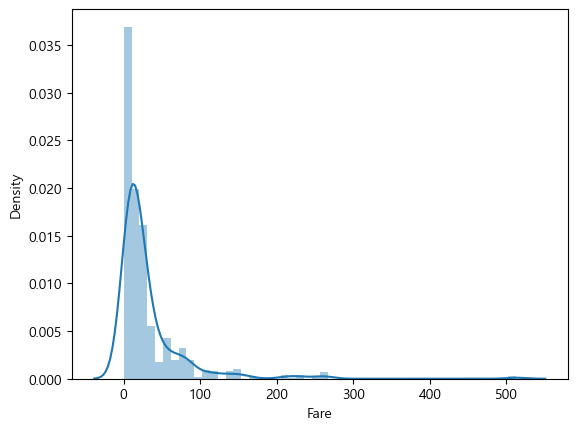

In [16]:
# 변수의 밀도를 확인하는 그래프 그려보기

sns.distplot(titanic['Fare'])

In [17]:
# 탑승 요금 이상치 확인 후 전처리

# 탑승 요금이 500 이상인 탑승객 데이터 확인하기
titanic[titanic['Fare']>=500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [18]:
# 탑승 요금이 500 이상인 3명의 고객의 요금을 1/3로 나눠줌

titanic.loc[titanic['Fare']>=500,'Fare'] = 512/3

In [19]:
# 이상치 처리 후 잘 반영됐는지 확인

titanic[titanic['Fare']>=500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [20]:
titanic.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [21]:
titanic.loc[259]

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                     35.0
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare              170.666667
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object

In [22]:
for i in titanic.index:
    if i == 259:
        print(titanic.iloc[i,:])

Survived                              1
Pclass                                2
Name        Parrish, Mrs. (Lutie Davis)
Sex                              female
Age                                50.0
SibSp                                 0
Parch                                 1
Ticket                           230433
Fare                               26.0
Cabin                               NaN
Embarked                              S
Name: 260, dtype: object


In [23]:
# 사망자와 생존자로 나누어 distplot 그려보기

# 사망자 데이터프레임 생성
perish = titanic[titanic['Survived']==0]
# 생존자 데이터프레임 생성
survivor = titanic[titanic['Survived']==1]

In [24]:
perish['Survived'].value_counts()

Survived
0    549
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20072\3720973456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perish['Fare'], label='Perish')
C:\Users\user\AppData\Local\Temp\ipykernel_20072\3720973456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survivor['Fare'], label = 'Survivor')


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


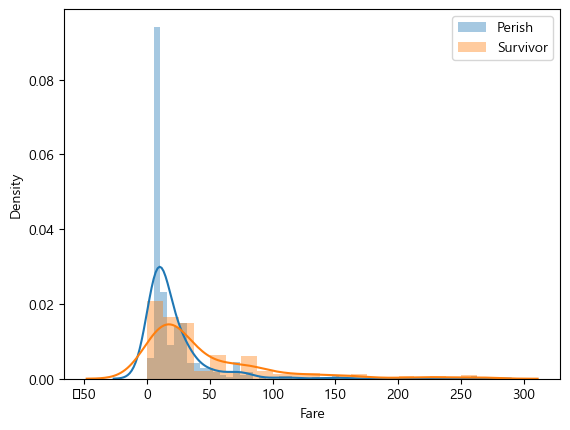

In [25]:
sns.distplot(perish['Fare'], label='Perish')
sns.distplot(survivor['Fare'], label = 'Survivor')
plt.legend()

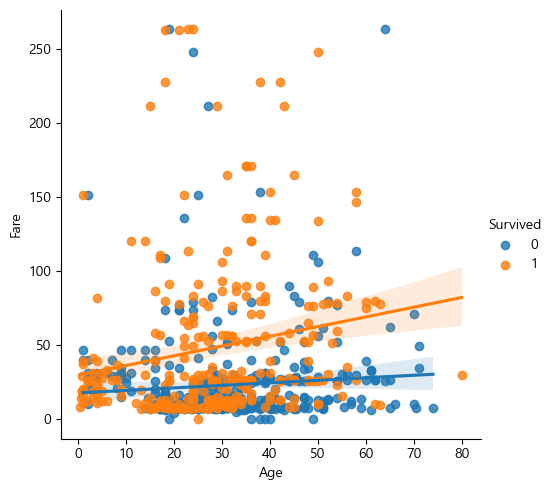

In [26]:
# 개별 탑승객의 feature 간 관계 확인하는 산점도 그래프 그려보기

sns.lmplot(data=titanic, x='Age', y='Fare', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

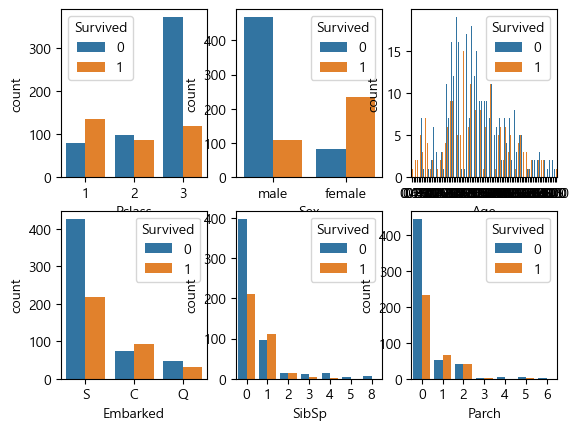

In [27]:
# 여러 개의 plot을 한 번에 그려서 확인해보기

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

sns.countplot(data=titanic, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=titanic, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=titanic, x='Age', hue='Survived', ax=ax3)
sns.countplot(data=titanic, x='Embarked', hue='Survived', ax=ax4)
sns.countplot(data=titanic, x='SibSp', hue='Survived', ax=ax5)
sns.countplot(data=titanic, x='Parch', hue='Survived', ax=ax6)

In [28]:
# 함께 탑승한 가족 수 칼럼 새로 생성

titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']

In [29]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


<Axes: xlabel='Family_Size', ylabel='count'>

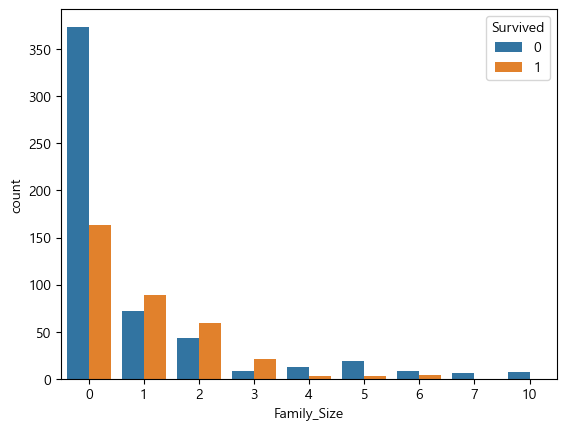

In [30]:
sns.countplot(data=titanic, x='Family_Size', hue='Survived')

In [31]:
# Alone 새롭게 생성하기

# Family size칼럼에서 혼자 왔으면 Alone 칼럼에 1을 넣고, 동행자가 있으면 0을 넣어줌
titanic.loc[titanic['Family_Size'] == 0,'Alone'] = 1
titanic.loc[titanic['Family_Size'] != 0,'Alone'] = 0

In [32]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0


In [33]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
# 사물함 사용여부 칼럼 새로 만들기

titanic.loc[titanic['Cabin'].isnull(), 'Cabin_Use'] = 0
titanic.loc[titanic['Cabin'].notnull(), 'Cabin_Use'] = 1

In [35]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0


In [36]:
titanic['Cabin_Use'].value_counts()

Cabin_Use
0.0    687
1.0    204
Name: count, dtype: int64

In [37]:
# 이름 확인하기

titanic['Name'].sample(30)

PassengerId
586                                  Taussig, Miss. Ruth
662                                    Badt, Mr. Mohamed
817                         Heininen, Miss. Wendla Maria
619                          Becker, Miss. Marion Louise
718                  Troutt, Miss. Edwina Celia "Winnie"
91                                  Christmann, Mr. Emil
416              Meek, Mrs. Thomas (Annie Louise Rowley)
765                               Eklund, Mr. Hans Linus
53              Harper, Mrs. Henry Sleeper (Myna Haxtun)
227                            Mellors, Mr. William John
579                     Caram, Mrs. Joseph (Maria Elias)
596                          Van Impe, Mr. Jean Baptiste
76                               Moen, Mr. Sigurd Hansen
876                     Najib, Miss. Adele Kiamie "Jane"
90                                Celotti, Mr. Francesco
35                               Meyer, Mr. Edgar Joseph
390                                Lehmann, Miss. Bertha
152                

In [38]:
a = 'cat'
a

'cat'

In [39]:
a[2]

't'

In [40]:
b='c a t'
b

'c a t'

In [41]:
b.split(' ')

['c', 'a', 't']

In [42]:
c = 'Sage, Miss. Dorothy Edith "Dolly"'
c

'Sage, Miss. Dorothy Edith "Dolly"'

In [43]:
c.split(', ')[1]

'Miss. Dorothy Edith "Dolly"'

In [44]:
c.split(', ')[1].split('. ')[0]

'Miss'

In [45]:
c.split(', ')[1].split('. ')[0]

'Miss'

In [46]:
# 이름 칼럼 내 호칭만 잘라내는 함수 정의하기

def find_title(name):
    return name.split(', ')[1].split('. ')[0]

In [47]:
titanic['Title'] = titanic['Name'].apply(find_title)

In [48]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,Miss


In [49]:
titanic['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

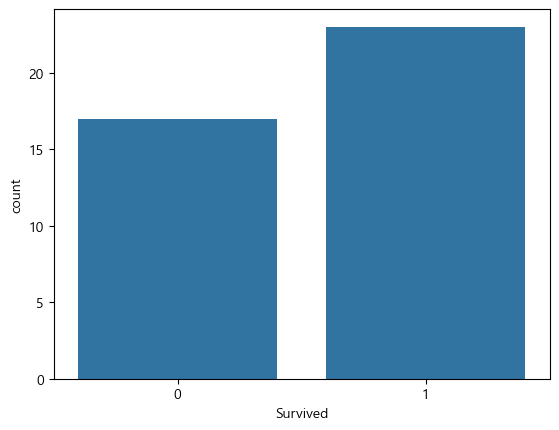

In [50]:
# 호칭이 마스터인 탑승객의 생존여부 확인
master = titanic[titanic['Title']=='Master']
sns.countplot(data=master, x='Survived')

In [51]:
# 마스터 칼럼 생성하기
# 호칭이 마스터면 1, 아니면 0
titanic.loc[titanic['Title']=='Master', 'Master'] = 1
titanic.loc[titanic['Title']!='Master', 'Master'] = 0

In [52]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use,Title,Master
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,Mr,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,Mrs,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,Miss,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,Mrs,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,Rev,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,Miss,0.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,Miss,0.0


In [53]:
# 호칭 칼럼 인코딩

# 1. 기타 호칭으로 묶어주기
titanic['Title'].value_counts()<=6

Title
Mr              False
Miss            False
Mrs             False
Master          False
Dr              False
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Capt             True
Ms               True
Sir              True
Lady             True
Mme              True
Don              True
Jonkheer         True
Name: count, dtype: bool

In [114]:
non_etc = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']

def title_etc(title):
    if title in non_etc:
        return title
    else:
        return 'etc'

In [116]:
titanic['Title_encode'] = titanic['Title'].apply(title_etc)

In [118]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use,Title,Master,Title_encode
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,Mr,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,Mrs,0.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,Miss,0.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,Mrs,0.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,Mr,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,Rev,0.0,etc
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,Miss,0.0,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,Miss,0.0,Miss


In [120]:
# 호칭 카테고리 인코딩

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [122]:
titanic['Title_label'] = le.fit_transform(titanic['Title_encode'])
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use,Title,Master,Title_encode,Title_label
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,Mr,0.0,Mr,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,Mrs,0.0,Mrs,4
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,Miss,0.0,Miss,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,Mrs,0.0,Mrs,4
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,Mr,0.0,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,Rev,0.0,etc,5
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,Miss,0.0,Miss,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,Miss,0.0,Miss,2


In [124]:
titanic['Title_label'].value_counts()

Title_label
3    517
2    182
4    125
1     40
5     20
0      7
Name: count, dtype: int64

In [126]:
# 성별 인코딩
# 남자면 0, 여자면 1
titanic.loc[titanic['Sex']=='male', 'Sex_encode'] = 0
titanic.loc[titanic['Sex']!='male', 'Sex_encode'] = 1

In [128]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Cabin_Use,Title,Master,Title_encode,Title_label,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,Mr,0.0,Mr,3,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,Mrs,0.0,Mrs,4,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,0.0,Miss,0.0,Miss,2,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0,Mrs,0.0,Mrs,4,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,Mr,0.0,Mr,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0,0.0,Rev,0.0,etc,5,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0,1.0,Miss,0.0,Miss,2,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0,0.0,Miss,0.0,Miss,2,1.0


In [134]:
# 선착장 원핫인코딩

embarked = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked], axis=1)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Alone,Cabin_Use,Title,Master,Title_encode,Title_label,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,0.0,Mr,0.0,Mr,3,0.0,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0.0,1.0,Mrs,0.0,Mrs,4,1.0,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1.0,0.0,Miss,0.0,Miss,2,1.0,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0.0,1.0,Mrs,0.0,Mrs,4,1.0,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,1.0,0.0,Mr,0.0,Mr,3,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,...,1.0,0.0,Rev,0.0,etc,5,0.0,False,False,True
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,1.0,1.0,Miss,0.0,Miss,2,1.0,False,False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0.0,0.0,Miss,0.0,Miss,2,1.0,False,False,True


In [138]:
# age 결측치 확인

titanic['Age'].isnull().sum()

177

In [142]:
# 특징에 따른 나이의 평균 확인

print('남자평균나이: ', titanic[titanic['Sex']=='male'].Age.mean())
print('여자평균나이: ', titanic[titanic['Sex']=='female'].Age.mean())

남자평균나이:  30.72664459161148
여자평균나이:  27.915708812260537


In [146]:
print('1등급 평균나이: ', titanic[titanic['Pclass']==1].Age.mean())
print('2등급 평균나이: ', titanic[titanic['Pclass']==2].Age.mean())
print('3등급 평균나이: ', titanic[titanic['Pclass']==3].Age.mean())

1등급 평균나이:  38.233440860215055
2등급 평균나이:  29.87763005780347
3등급 평균나이:  25.14061971830986


In [150]:
# 성별과 등급을 둘 다 고려해서 분류하고, 각 분류에 해당되는 고객의 연령이 결측치라면 그 분류의 평균나이를 넣어주세요.
# 힌트: 조건을 3개 걸어야 합니다. 결측치인지, 성별은 뭔지, 등급은 뭔지

#남자&1등급
m1 = titanic[(titanic['Sex']=='male')&(titanic['Pclass']==1)].Age.mean()
#남자&2등급
m2 = titanic[(titanic['Sex']=='male')&(titanic['Pclass']==2)].Age.mean()
#남자&3등급
m3 = titanic[(titanic['Sex']=='male')&(titanic['Pclass']==3)].Age.mean()
#여자&1등급
f1 = titanic[(titanic['Sex']=='female')&(titanic['Pclass']==1)].Age.mean()
#여자&2등급
f2 = titanic[(titanic['Sex']=='female')&(titanic['Pclass']==2)].Age.mean()
#여자&3등급
f3 = titanic[(titanic['Sex']=='female')&(titanic['Pclass']==3)].Age.mean()

In [152]:
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==1),'Age'] = m1
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==2),'Age'] = m2
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='male')&(titanic['Pclass']==3),'Age'] = m3
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==1),'Age'] = f1
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==2),'Age'] = f2
titanic.loc[(titanic['Age'].isnull())&(titanic['Sex']=='female')&(titanic['Pclass']==3),'Age'] = f3

In [156]:
titanic['Age'].isnull().sum()

0

# 모델 학습 및 예측

In [161]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone', 'Cabin_Use',
       'Title', 'Master', 'Title_encode', 'Title_label', 'Sex_encode',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [163]:
feature = ['Pclass','Age','Fare','Family_Size', 'Alone', 'Cabin_Use','Master','Title_label',
           'Sex_encode','Embarked_C', 'Embarked_Q', 'Embarked_S']

In [165]:
X = titanic[feature]
X

,Pclass,Age,Fare,Family_Size,Alone,Cabin_Use,Master,Title_label,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,3,22.00,7.2500,1,0.0,0.0,0.0,3,0.0,False,False,True
2,1,38.00,71.2833,1,0.0,1.0,0.0,4,1.0,True,False,False
3,3,26.00,7.9250,0,1.0,0.0,0.0,2,1.0,False,False,True
4,1,35.00,53.1000,1,0.0,1.0,0.0,4,1.0,False,False,True
5,3,35.00,8.0500,0,1.0,0.0,0.0,3,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.00,13.0000,0,1.0,0.0,0.0,5,0.0,False,False,True
888,1,19.00,30.0000,0,1.0,1.0,0.0,2,1.0,False,False,True
889,3,21.75,23.4500,3,0.0,0.0,0.0,2,1.0,False,False,True


In [167]:
y = titanic['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [169]:
# 학습데이터 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [171]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [173]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [175]:
logit = LogisticRegression()

In [177]:
logit.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
y_logit_pred = logit.predict(X_test)

In [181]:
y_logit_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [195]:
print('Accuracy score: ', accuracy_score(y_logit_pred, y_test))
print('Confusion matrics: ', confusion_matrix(y_logit_pred, y_test))
print('Classification report: ')
print(classification_report(y_logit_pred, y_test))

Accuracy score:  0.8435754189944135
Confusion matrics:  [[91 14]
 [14 60]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [197]:
# 트리 기반 모델

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [199]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [201]:
y_dt_pred = dt.predict(X_test)

In [203]:
print('Accuracy score: ', accuracy_score(y_dt_pred, y_test))
print('Confusion matrics: ', confusion_matrix(y_dt_pred, y_test))
print('Classification report: ')
print(classification_report(y_dt_pred, y_test))

Accuracy score:  0.7932960893854749
Confusion matrics:  [[93 25]
 [12 49]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       118
           1       0.66      0.80      0.73        61

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.81      0.79      0.80       179



In [219]:
# Grid Search를 통해 Hyper Parameter tunning

hyper_list = []

max_depth_list = [5,7,9,11,13,15]
max_feature_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for a in max_depth_list:
    for b in max_feature_list:
        model = GradientBoostingClassifier(n_estimators=500,
                                      max_depth=a,
                                      max_features=b,
                                      random_state=24,
                                      #n_jobs=-1
                                          )
        model.fit(X_train, y_train)
        gb_pred = model.predict(X_test)
        score = accuracy_score(gb_pred, y_test)
        hyper_list.append({'점수':score,
                            'max_depth': a,
                          'max_features':b})
        print(f'현재 스코어는{score}')

현재 스코어는0.8379888268156425
현재 스코어는0.8156424581005587
현재 스코어는0.8156424581005587
현재 스코어는0.8212290502793296
현재 스코어는0.8156424581005587
현재 스코어는0.8156424581005587
현재 스코어는0.8268156424581006
현재 스코어는0.8100558659217877
현재 스코어는0.8156424581005587
현재 스코어는0.8212290502793296
현재 스코어는0.8100558659217877
현재 스코어는0.8156424581005587
현재 스코어는0.8156424581005587
현재 스코어는0.8100558659217877
현재 스코어는0.8212290502793296
현재 스코어는0.8212290502793296
현재 스코어는0.8156424581005587
현재 스코어는0.8212290502793296
현재 스코어는0.8268156424581006
현재 스코어는0.8268156424581006
현재 스코어는0.8156424581005587
현재 스코어는0.8212290502793296
현재 스코어는0.8212290502793296
현재 스코어는0.8100558659217877
현재 스코어는0.8156424581005587
현재 스코어는0.7988826815642458
현재 스코어는0.8212290502793296
현재 스코어는0.8156424581005587
현재 스코어는0.8268156424581006
현재 스코어는0.8044692737430168
현재 스코어는0.8212290502793296
현재 스코어는0.8268156424581006
현재 스코어는0.8156424581005587
현재 스코어는0.8156424581005587
현재 스코어는0.8100558659217877
현재 스코어는0.8044692737430168


In [220]:
pd.DataFrame(hyper_list).sort_values(by='점수',ascending=False)

,점수,max_depth,max_features
0,0.837989,5,0.5
6,0.826816,7,0.5
31,0.826816,15,0.6
28,0.826816,13,0.9
19,0.826816,11,0.6
18,0.826816,11,0.5
21,0.821229,11,0.8
22,0.821229,11,0.9
9,0.821229,7,0.8
30,0.821229,15,0.5
